In [0]:
import numpy as np
import matplotlib.pyplot as plt

##データ作成

In [0]:
data_num = 15
mean = 0
valiance = 5
data = np.zeros((data_num, 2))

data[:,0] = [np.random.normal(mean, valiance) for j in range(data_num)]
data[:,1] = [np.random.normal(mean, valiance/4) for j in range(data_num)]
for i in range(len(data[:,1])):
  data[i][1] = np.sin(data[i][0]) + data[i][1]

##データplot

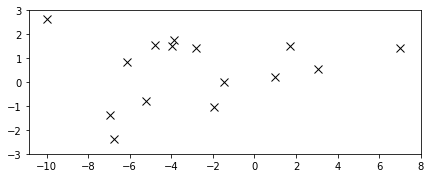

In [3]:
plt.figure(figsize=(np.max(data[:,0]),np.max(data[:,1])))
plt.plot (data[:,0], data[:,1], 'kx', markersize=8)
plt.xticks(np.arange(int(np.min(data[:,0]))-1, int(np.max(data[:,0])) + 2, 2))
plt.yticks(np.arange(int(np.min(data[:,1]))-1, int(np.max(data[:,1])) + 2, 1))
plt.show()

##モデルの定義

In [0]:
def Phi(x):
  return [1, x, np.square(x), x*x*x, np.sin(x), np.cos(x)]

x = 0
W = np.zeros((len(Phi(x)), 1))

##パラメータ計算

In [0]:
#準備
X = np.array([Phi(x) for x in data[:,0]])
Y = data[:,1]

#(Eq. 1.49)
item_1 = np.linalg.inv( np.dot(X.T, X) )
item_2 = np.dot(item_1, X.T)
W = np.dot( item_2, Y)

##plot

Text(0, 0.5, 'y')

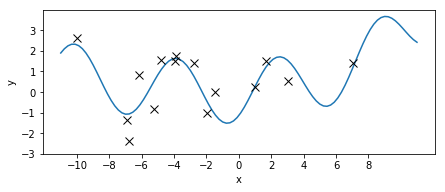

In [7]:
x_ = np.linspace(-(int(max(abs(data[:,0]))))-2, (int(max(abs(data[:,0]))))+2, 100)
y_ = [np.dot(W.T, Phi(x))  for x in x_]

plt.figure(figsize=(np.max(data[:,0]),np.max(data[:,1])))
plt.plot(x_, y_)

plt.plot (data[:,0], data[:,1], 'kx', markersize=8)
plt.xticks(np.arange(int(np.min(data[:,0]))-1, int(np.max(data[:,0])) + 2, 2))
plt.yticks(np.arange(int(np.min(data[:,1]))-1, int(np.max(data[:,1])) + 2, 1))
plt.xlabel('x')
plt.ylabel('y')

##リッジ回帰

In [0]:
#(Eq. 1.77)
alpha = 0.1

item_1 = np.linalg.inv( np.dot(X.T, X) + alpha*np.identity(len(X[0]), int))
item_2 = np.dot(item_1, X.T)
W = np.dot( item_2, Y)

Text(0, 0.5, 'y')

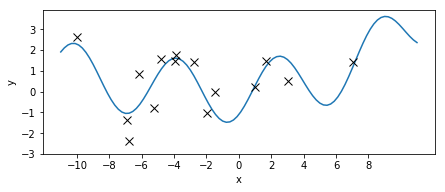

In [17]:
x_ = np.linspace(-(int(max(abs(data[:,0]))))-2, (int(max(abs(data[:,0]))))+2, 100)
y_ = [np.dot(W, Phi(x)) for x in x_]

plt.figure(figsize=(np.max(data[:,0]),np.max(data[:,1])))
plt.plot(x_, y_)

plt.plot (data[:,0], data[:,1], 'kx', markersize=8)
plt.xticks(np.arange(int(np.min(data[:,0]))-1, int(np.max(data[:,0])) + 2, 2))
plt.yticks(np.arange(int(np.min(data[:,1]))-1, int(np.max(data[:,1])) + 2, 1))
plt.xlabel('x')
plt.ylabel('y')